In [47]:
# Load pacakges ----
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from IPython.display import HTML
from IPython.display import Markdown as md
from IPython.core.display import HTML as Center
from config import marker, start_date, end_date, demographics, codelist_path
from IPython.display import Image, display

from utilities import *
%matplotlib inline

In [48]:
md(f"## Changes in {marker} between {start_date} and {end_date}")

## Changes in Blood pressure targets in the Quality and Outcomes Framework (QOF) between 2019-09-01 and 2022-03-31

In [49]:
md(f"Below are various time-series graphs showing changes in {marker} code use.")

Below are various time-series graphs showing changes in Blood pressure targets in the Quality and Outcomes Framework (QOF) code use.

In [50]:
display(
md("### Methods"),
md(f"Using OpenSAFELY-TPP, covering 40% of England's population, we have assessed coding activity related to {marker} between {start_date} and {end_date}. The codelist used can be found here at [OpenSAFELY Codelists](https://codelists.opensafely.org/).  For each month within the study period, we have calculated the rate at which the code was recorded per 1000 registered patients."),
md(f"All analytical code and output is available for inspection at the [OpenSAFELY GitHub repository](https://github.com/opensafely)")
)

### Methods

Using OpenSAFELY-TPP, covering 40% of England's population, we have assessed coding activity related to Blood pressure targets in the Quality and Outcomes Framework (QOF) between 2019-09-01 and 2022-03-31. The codelist used can be found here at [OpenSAFELY Codelists](https://codelists.opensafely.org/).  For each month within the study period, we have calculated the rate at which the code was recorded per 1000 registered patients.

All analytical code and output is available for inspection at the [OpenSAFELY GitHub repository](https://github.com/opensafely)

In [51]:
codelist = pd.read_csv(f'../{codelist_path}')

image_paths = {d: f'../output/plot_{d}.png' for d in demographics}
image_paths['total'] = '../output/plot_total.png'

In [73]:
md(f"## Total {marker} ")

## Total Blood pressure targets in the Quality and Outcomes Framework (QOF) Number

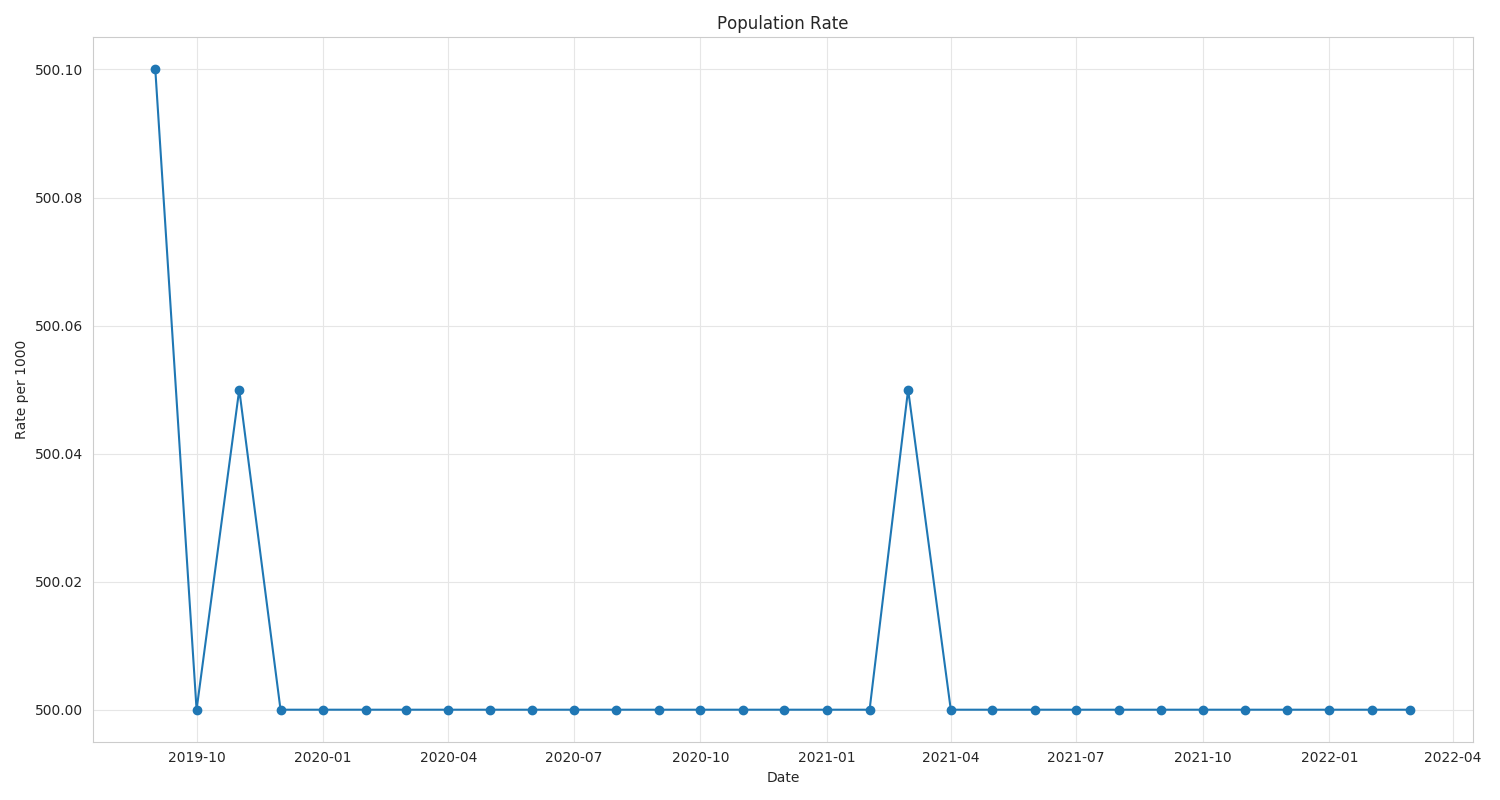

In [74]:
Image(filename=image_paths['total'])

In [54]:
display(
    md("### Sub totals by sub codes"),
    md("Events for the top 5 subcodes across the study period")
)

### Sub totals by sub codes

Events for the top 5 subcodes across the study period

In [55]:
child_table = pd.read_csv('../output/child_code_table.csv')
child_table

,code,Events,Events (thousands),Description
0,413606001,139.0,0.139,Average home systolic blood pressure
1,314442009,132.0,0.132,Minimum night interval systolic blood pressure
2,400975005,129.0,0.129,Standing diastolic blood pressure
3,1091811000000102,128.0,0.128,Diastolic arterial pressure
4,386536003,125.0,0.125,Systemic blood pressure


In [56]:
md("## Total Number by GP Practice")

## Total Number by GP Practice

In [57]:
practice_table = pd.read_csv('../output/rate_table_practice.csv', parse_dates=['date']).sort_values(by='date')
percentage_practices = get_percentage_practices(practice_table)
md(f"Percentage of practices with a recording of a code within the codelist during the study period: {percentage_practices}%")

Percentage of practices with a recording of a code within the codelist during the study period: 91.3%

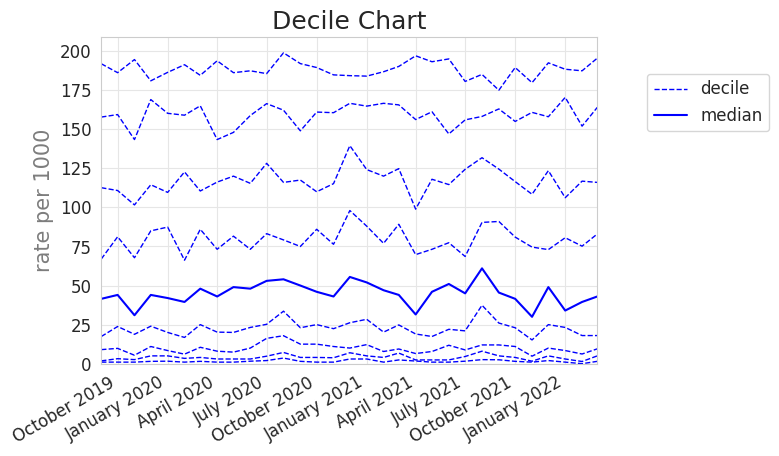

In [58]:
Image(filename='../output/decile_chart.png')

In [59]:
i = 0
md(f"## Breakdown of {marker} by '{demographics[i]}'")

## Breakdown of Blood pressure targets in the Quality and Outcomes Framework (QOF) by 'sex'

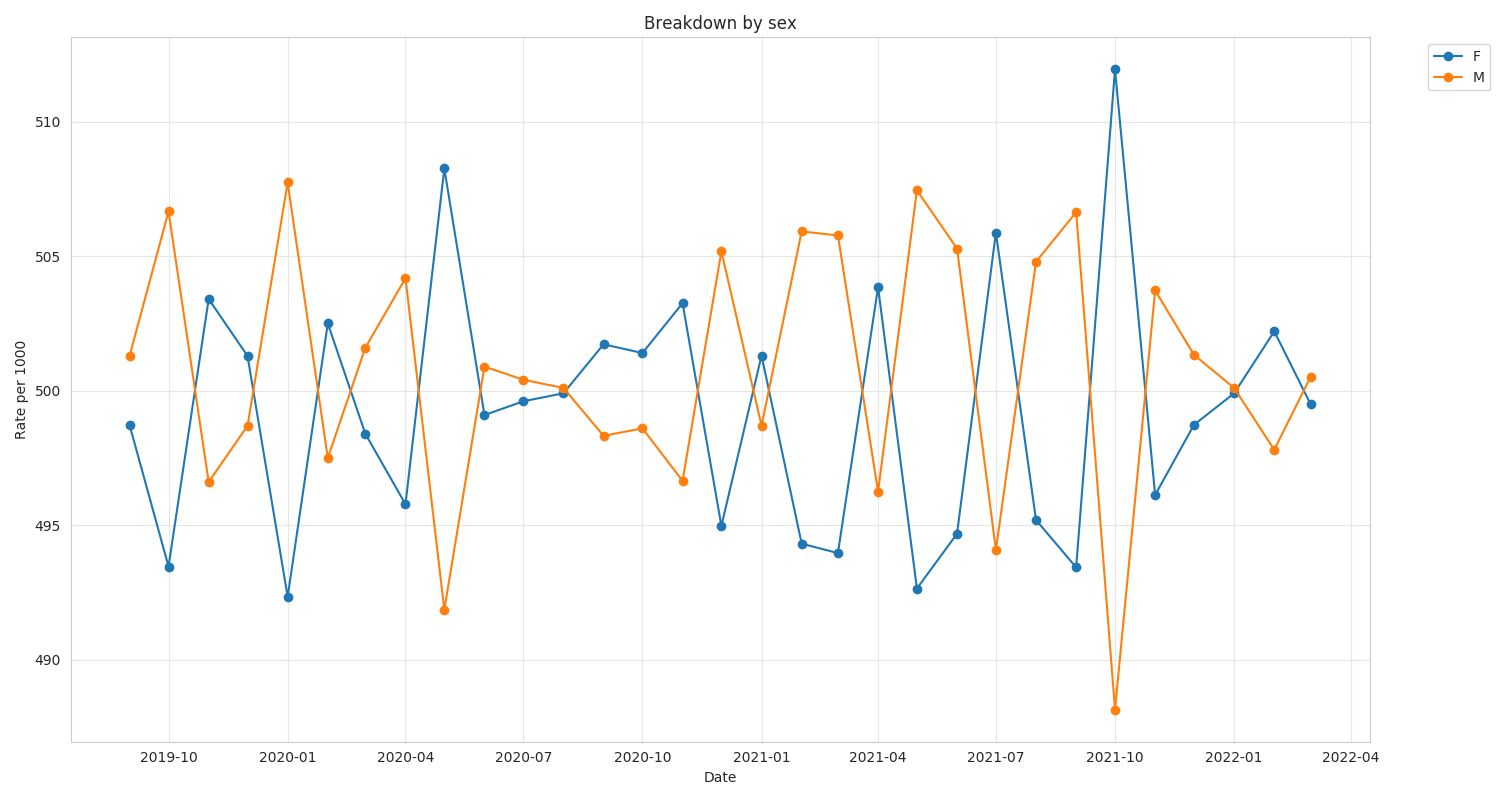

In [60]:
Image(filename=image_paths[demographics[i]])

In [61]:
i += 1
md(f"## Breakdown of {marker} by '{demographics[i]}'")

## Breakdown of Blood pressure targets in the Quality and Outcomes Framework (QOF) by 'age_band'

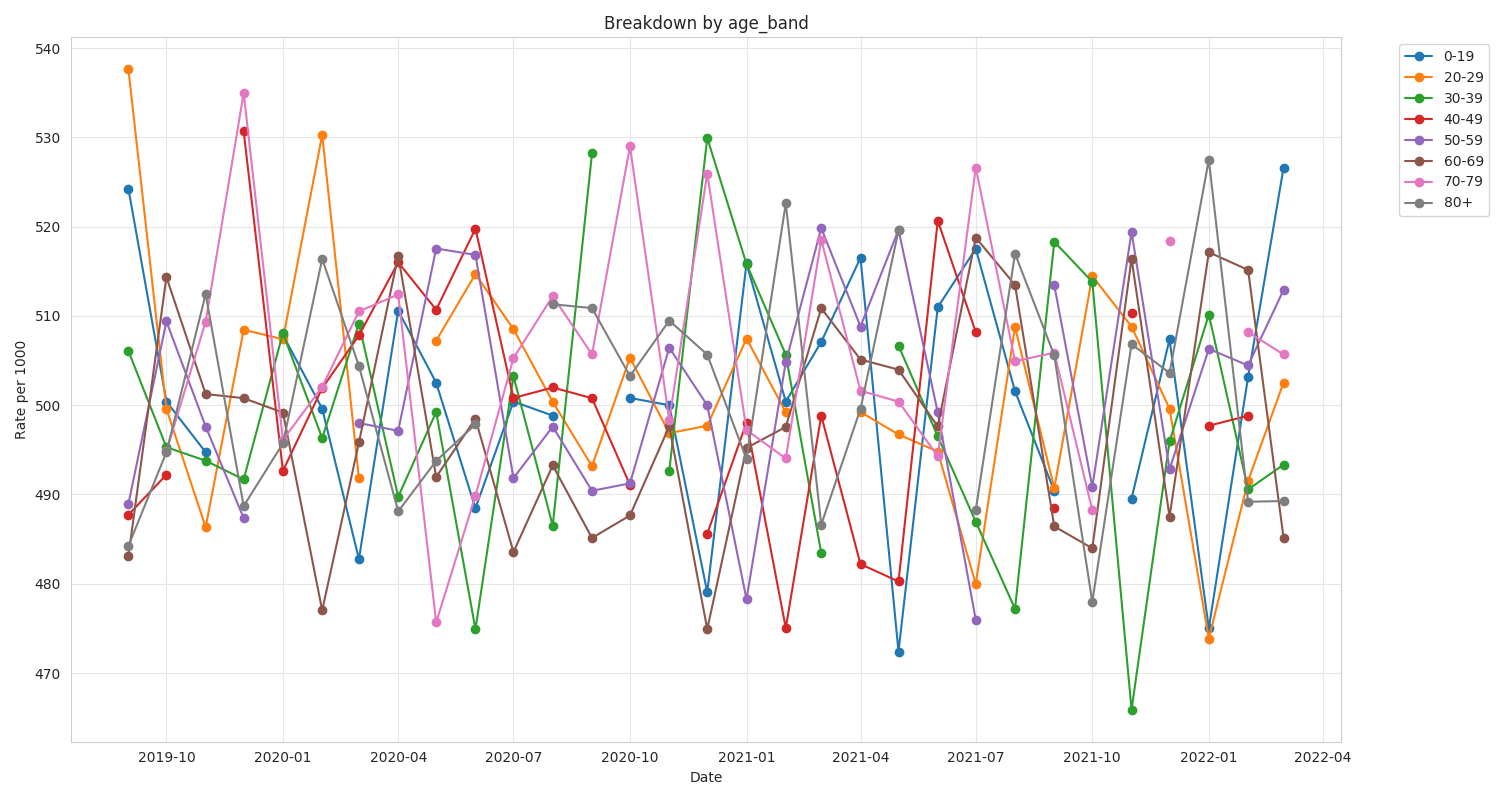

In [62]:
Image(filename=image_paths[demographics[i]])

In [63]:
i += 1
md(f"## Breakdown of {marker} by '{demographics[i]}'")

## Breakdown of Blood pressure targets in the Quality and Outcomes Framework (QOF) by 'region'

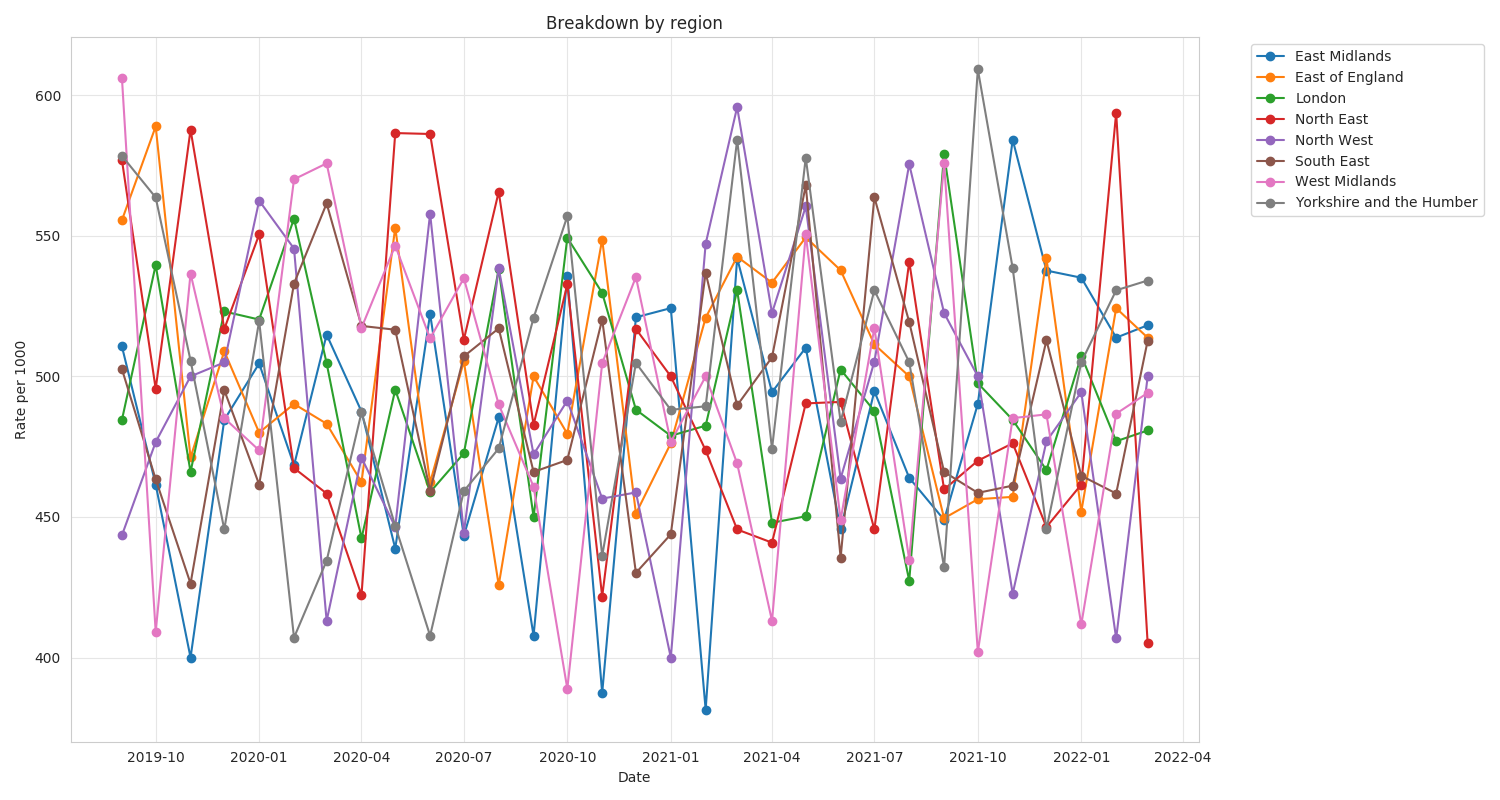

In [64]:
Image(filename=image_paths[demographics[i]])

In [65]:
i += 1
md(f"## Breakdown of {marker} by '{demographics[i]}'") 

## Breakdown of Blood pressure targets in the Quality and Outcomes Framework (QOF) by 'imd'

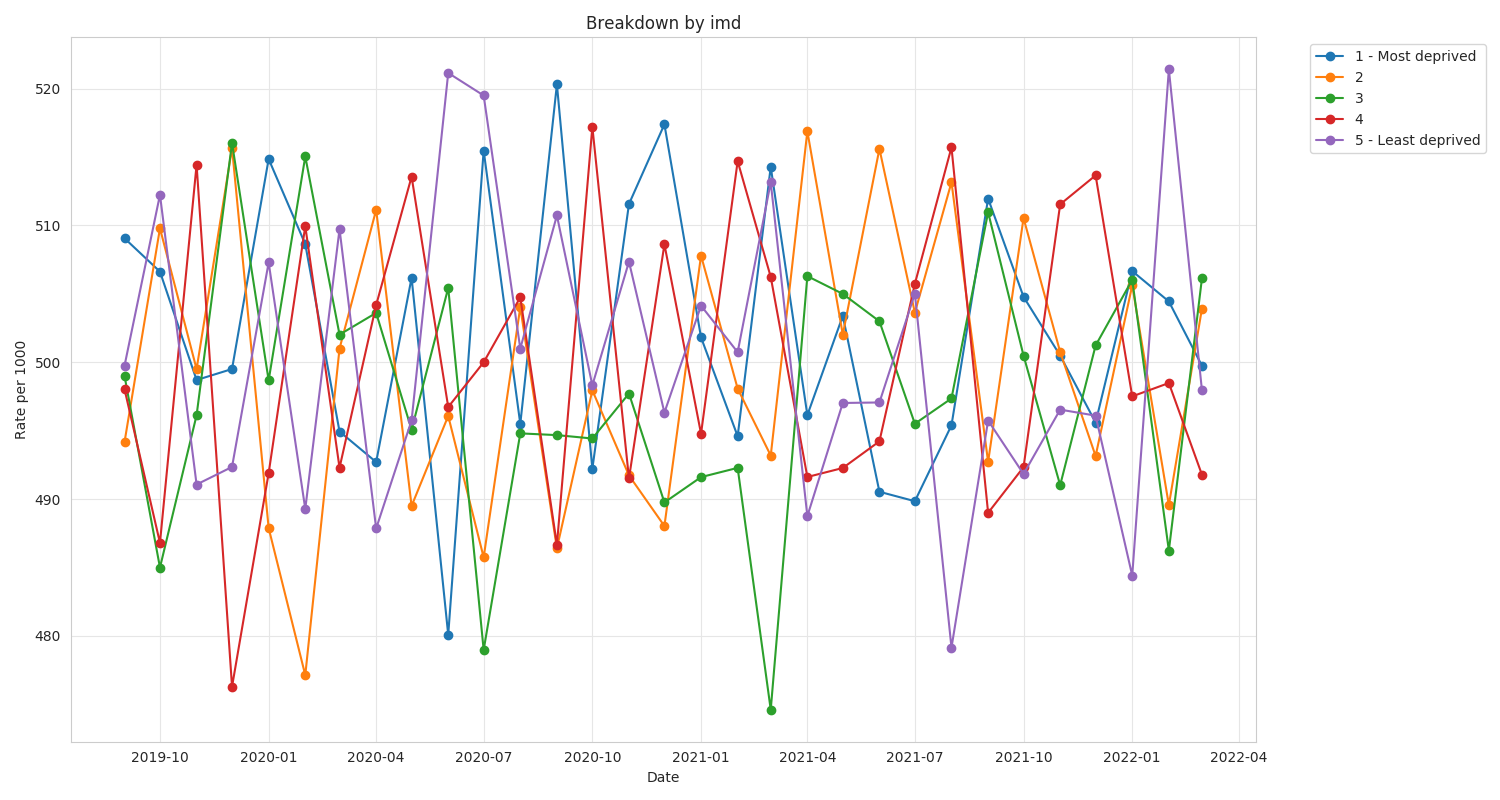

In [66]:
Image(filename=image_paths[demographics[i]])

In [67]:
i += 1
md(f"## Breakdown of {marker} by '{demographics[i]}'")  

## Breakdown of Blood pressure targets in the Quality and Outcomes Framework (QOF) by 'ethnicity'

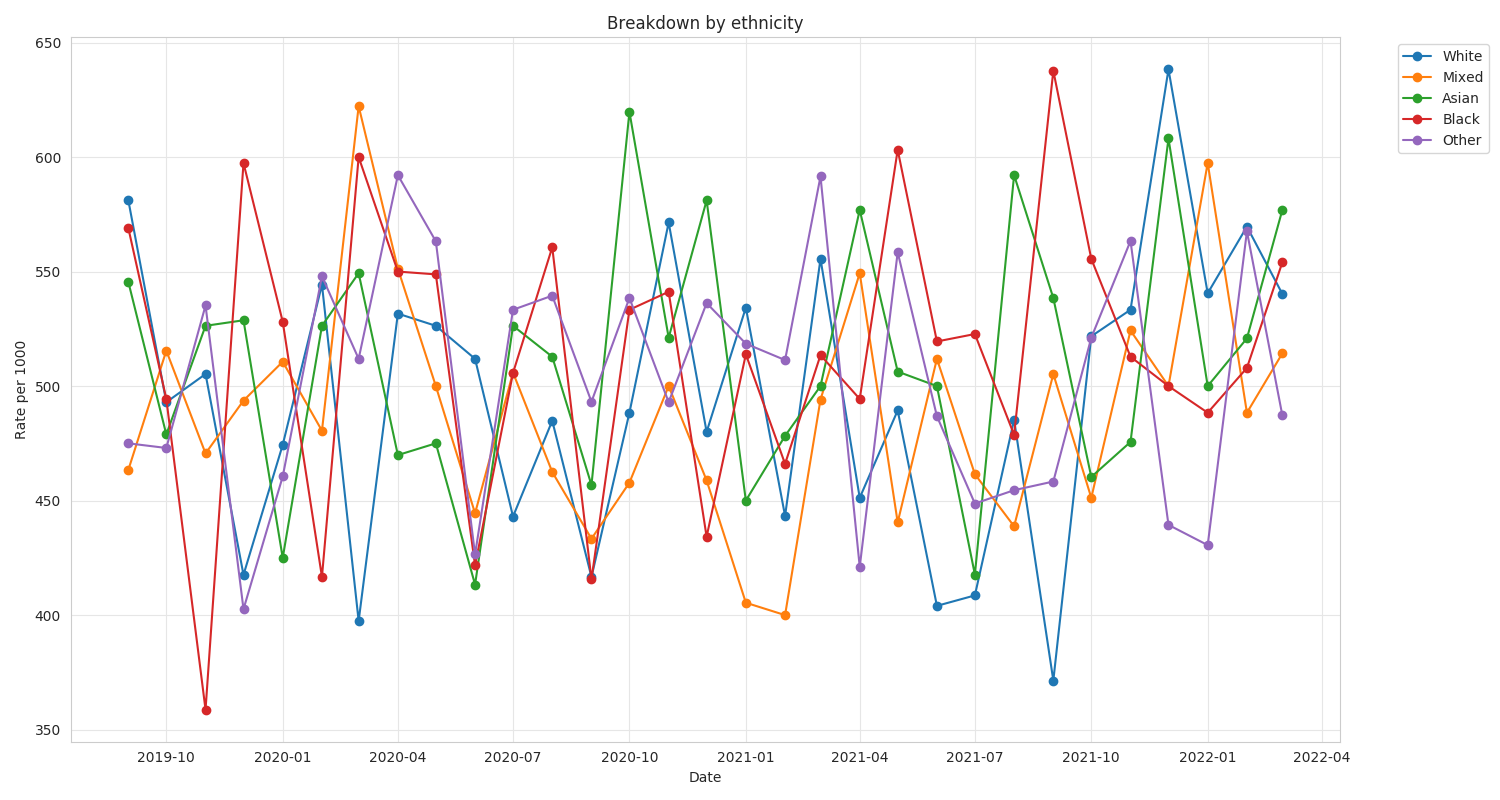

In [68]:
Image(filename=image_paths[demographics[i]])

In [69]:
i += 1
md(f"## Breakdown of {marker} by '{demographics[i]}'")

## Breakdown of Blood pressure targets in the Quality and Outcomes Framework (QOF) by 'learning_disability'

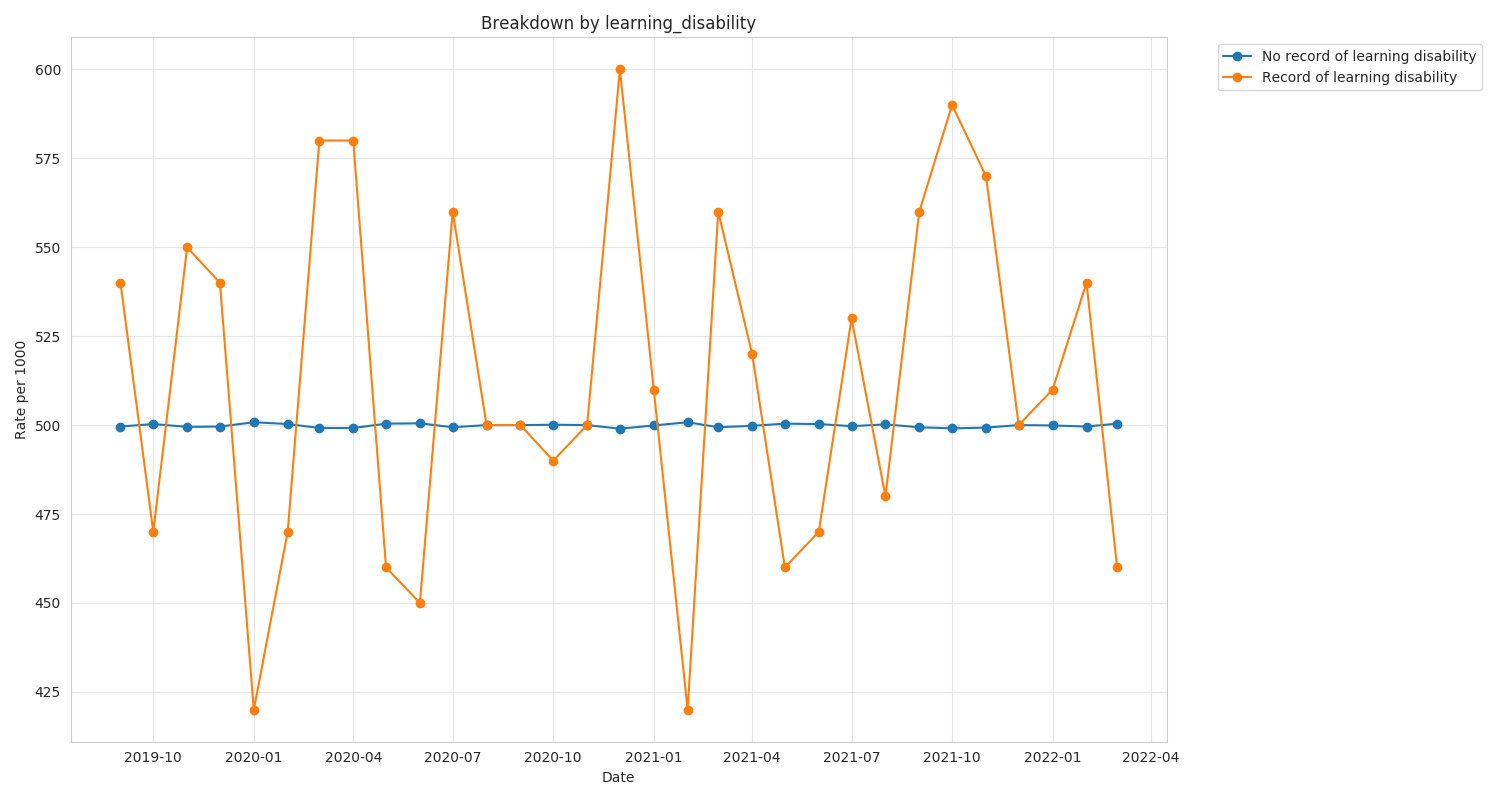

In [70]:
display(Image(filename=image_paths[demographics[i]]))

In [71]:
i += 1
md(f"## Breakdown of {marker} by '{demographics[i]}'")

## Breakdown of Blood pressure targets in the Quality and Outcomes Framework (QOF) by 'care_home_status'

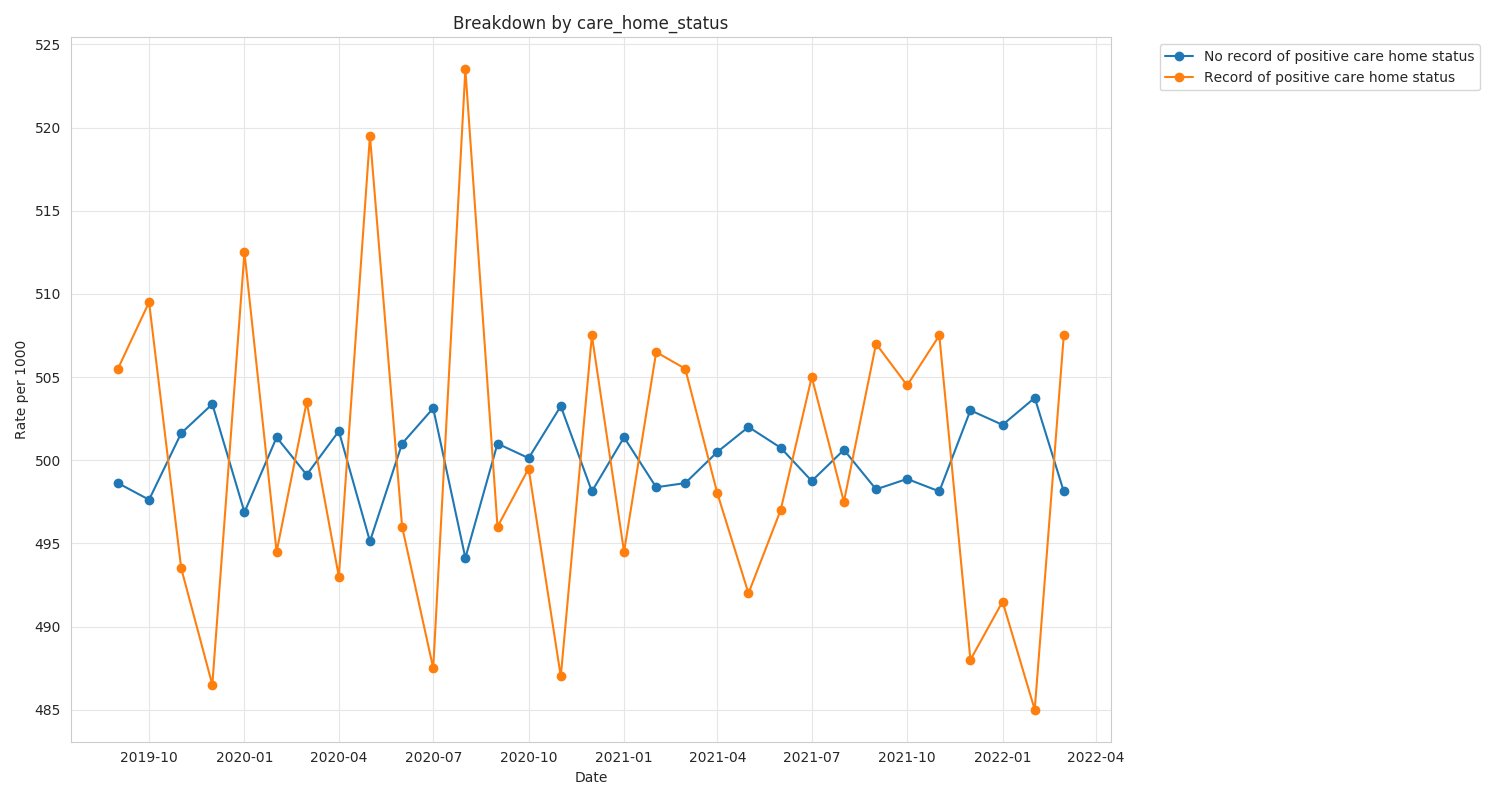

In [72]:
Image(filename=image_paths[demographics[i]]) 